        MANEJO DE VALORES NULOS CON PANDAS

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time # para medir el tiempo de ejecucion
from datetime import datetime # para convertir a datetime
import re # para usar expresiones regulares regex

# esta line es para que las graficas se vean en el notebook
%matplotlib inline 
plt.style.use('seaborn-v0_8-whitegrid')

Dataframe con valores nulos

In [301]:
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Nombre': ['Ana', 'Carlos', np.nan, 'Diana', 'Eduardo', 'Fernanda', 'Gustavo', np.nan, 'Irene', 'Juan'],
    'Edad': [25, np.nan, 32, 28, np.nan, 22, 35, 40, np.nan, 30],
    'Puntuacion': [85, 92, np.nan, 78, 88, np.nan, np.nan, 95, 82, 90],
    'Departamento': ['Ventas', np.nan, 'IT', 'Ventas', 'IT', 'RH', 'RH', 'IT', np.nan, 'Ventas'],
    'Fecha_ingreso': ['2020-01-15', '2019-03-22', np.nan, '2021-06-10', '2018-11-05', np.nan, '2022-02-28', '2017-09-12', '2020-07-19', np.nan]
}

df= pd.DataFrame(data)
df

,ID,Nombre,Edad,Puntuacion,Departamento,Fecha_ingreso
0,1,Ana,25.0,85.0,Ventas,2020-01-15
1,2,Carlos,NaN,92.0,NaN,2019-03-22
2,3,NaN,32.0,NaN,IT,NaN
3,4,Diana,28.0,78.0,Ventas,2021-06-10
4,5,Eduardo,NaN,88.0,IT,2018-11-05
5,6,Fernanda,22.0,NaN,RH,NaN
6,7,Gustavo,35.0,NaN,RH,2022-02-28
7,8,NaN,40.0,95.0,IT,2017-09-12
8,9,Irene,NaN,82.0,NaN,2020-07-19
9,10,Juan,30.0,90.0,Ventas,NaN


In [302]:
# valores nulos en la tabla, si es true, es nulo
df.isnull()  # Total de valores nulos por columna

,ID,Nombre,Edad,Puntuacion,Departamento,Fecha_ingreso
0,False,False,False,False,False,False
1,False,False,True,False,True,False
2,False,True,False,True,False,True
3,False,False,False,False,False,False
4,False,False,True,False,False,False
5,False,False,False,True,False,True
6,False,False,False,True,False,False
7,False,True,False,False,False,False
8,False,False,True,False,True,False
9,False,False,False,False,False,True


In [ ]:
# contar valores nulos por columna
df.isnull().sum()  

ID               0
Nombre           2
Edad             3
Puntuacion       3
Departamento     2
Fecha_ingreso    3
dtype: int64

In [304]:
# contar valores nulos por fila
df.isnull().sum(axis=1)  

0    0
1    2
2    3
3    0
4    1
5    2
6    1
7    1
8    2
9    1
dtype: int64

In [305]:
# verificar si hay valores nulos en el DataFrame
df.isnull().values.any().any()  # True si hay valores nulos en el DataFrame, fila y columna

np.True_

In [306]:
# promedio de valores nulos
df.isnull().mean()*100  # Promedio de valores nulos por columna

ID                0.0
Nombre           20.0
Edad             30.0
Puntuacion       30.0
Departamento     20.0
Fecha_ingreso    30.0
dtype: float64

In [ ]:
# promedio de valores nulos por fila
df.isnull().mean(axis=1)*100  

0     0.000000
1    33.333333
2    50.000000
3     0.000000
4    16.666667
5    33.333333
6    16.666667
7    16.666667
8    33.333333
9    16.666667
dtype: float64

Manipulación de valores nulos


In [308]:
# porcentaje de valores nulos por columna
df_II = df.dropna()
df_II

,ID,Nombre,Edad,Puntuacion,Departamento,Fecha_ingreso
0,1,Ana,25.0,85.0,Ventas,2020-01-15
3,4,Diana,28.0,78.0,Ventas,2021-06-10


In [309]:
df

,ID,Nombre,Edad,Puntuacion,Departamento,Fecha_ingreso
0,1,Ana,25.0,85.0,Ventas,2020-01-15
1,2,Carlos,NaN,92.0,NaN,2019-03-22
2,3,NaN,32.0,NaN,IT,NaN
3,4,Diana,28.0,78.0,Ventas,2021-06-10
4,5,Eduardo,NaN,88.0,IT,2018-11-05
5,6,Fernanda,22.0,NaN,RH,NaN
6,7,Gustavo,35.0,NaN,RH,2022-02-28
7,8,NaN,40.0,95.0,IT,2017-09-12
8,9,Irene,NaN,82.0,NaN,2020-07-19
9,10,Juan,30.0,90.0,Ventas,NaN


In [310]:
#eliminar filas solo si todas las columnas son nulas
df.dropna(how='all')  # Eliminar filas solo si todas las columnas son nulas
df

,ID,Nombre,Edad,Puntuacion,Departamento,Fecha_ingreso
0,1,Ana,25.0,85.0,Ventas,2020-01-15
1,2,Carlos,NaN,92.0,NaN,2019-03-22
2,3,NaN,32.0,NaN,IT,NaN
3,4,Diana,28.0,78.0,Ventas,2021-06-10
4,5,Eduardo,NaN,88.0,IT,2018-11-05
5,6,Fernanda,22.0,NaN,RH,NaN
6,7,Gustavo,35.0,NaN,RH,2022-02-28
7,8,NaN,40.0,95.0,IT,2017-09-12
8,9,Irene,NaN,82.0,NaN,2020-07-19
9,10,Juan,30.0,90.0,Ventas,NaN


In [311]:
df_III = pd.DataFrame( {
    'ID': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Nombre': [np.nan, 'Carlos', np.nan, 'Diana', 'Eduardo', 'Fernanda', 'Gustavo', np.nan, 'Irene', 'Juan'],
    'Edad': [None, np.nan, 32, 28, np.nan, 22, 35, 40, np.nan, 30],
    'Puntuacion': [np.nan,np.nan, np.nan, None, None, np.nan, np.nan, None, None, None],
    'Departamento': [None, np.nan, 'IT', 'Ventas', 'IT', 'RH', 'RH', 'IT', np.nan, 'Ventas'],
    'Fecha_ingreso': [None, '2019-03-22', np.nan, '2021-06-10', '2018-11-05', np.nan, '2022-02-28', '2017-09-12', '2020-07-19', np.nan]
})
df_III


,ID,Nombre,Edad,Puntuacion,Departamento,Fecha_ingreso
0,NaN,NaN,NaN,NaN,None,None
1,2.0,Carlos,NaN,NaN,NaN,2019-03-22
2,3.0,NaN,32.0,NaN,IT,NaN
3,4.0,Diana,28.0,NaN,Ventas,2021-06-10
4,5.0,Eduardo,NaN,NaN,IT,2018-11-05
5,6.0,Fernanda,22.0,NaN,RH,NaN
6,7.0,Gustavo,35.0,NaN,RH,2022-02-28
7,8.0,NaN,40.0,NaN,IT,2017-09-12
8,9.0,Irene,NaN,NaN,NaN,2020-07-19
9,10.0,Juan,30.0,NaN,Ventas,NaN


In [ ]:
# Eliminar filas solo si todas las columnas son nulas
df_III.dropna(how='all')  

,ID,Nombre,Edad,Puntuacion,Departamento,Fecha_ingreso
1,2.0,Carlos,NaN,NaN,NaN,2019-03-22
2,3.0,NaN,32.0,NaN,IT,NaN
3,4.0,Diana,28.0,NaN,Ventas,2021-06-10
4,5.0,Eduardo,NaN,NaN,IT,2018-11-05
5,6.0,Fernanda,22.0,NaN,RH,NaN
6,7.0,Gustavo,35.0,NaN,RH,2022-02-28
7,8.0,NaN,40.0,NaN,IT,2017-09-12
8,9.0,Irene,NaN,NaN,NaN,2020-07-19
9,10.0,Juan,30.0,NaN,Ventas,NaN


In [ ]:
# Eliminar columnas solo si todas las filas son nulas
df_III.dropna(axis=1, how='all')  

,ID,Nombre,Edad,Departamento,Fecha_ingreso
0,NaN,NaN,NaN,None,None
1,2.0,Carlos,NaN,NaN,2019-03-22
2,3.0,NaN,32.0,IT,NaN
3,4.0,Diana,28.0,Ventas,2021-06-10
4,5.0,Eduardo,NaN,IT,2018-11-05
5,6.0,Fernanda,22.0,RH,NaN
6,7.0,Gustavo,35.0,RH,2022-02-28
7,8.0,NaN,40.0,IT,2017-09-12
8,9.0,Irene,NaN,NaN,2020-07-19
9,10.0,Juan,30.0,Ventas,NaN


In [314]:
# elimiminar columna si tiene un numero repetido de nulos
df.dropna(thresh=8, axis=1)  # thresh=8, axis=1 Eliminar columnas si tienen menos de 7 valores no nulos


,ID,Nombre,Departamento
0,1,Ana,Ventas
1,2,Carlos,NaN
2,3,NaN,IT
3,4,Diana,Ventas
4,5,Eduardo,IT
5,6,Fernanda,RH
6,7,Gustavo,RH
7,8,NaN,IT
8,9,Irene,NaN
9,10,Juan,Ventas


Reemplazo de valores faltantes

In [315]:
df

,ID,Nombre,Edad,Puntuacion,Departamento,Fecha_ingreso
0,1,Ana,25.0,85.0,Ventas,2020-01-15
1,2,Carlos,NaN,92.0,NaN,2019-03-22
2,3,NaN,32.0,NaN,IT,NaN
3,4,Diana,28.0,78.0,Ventas,2021-06-10
4,5,Eduardo,NaN,88.0,IT,2018-11-05
5,6,Fernanda,22.0,NaN,RH,NaN
6,7,Gustavo,35.0,NaN,RH,2022-02-28
7,8,NaN,40.0,95.0,IT,2017-09-12
8,9,Irene,NaN,82.0,NaN,2020-07-19
9,10,Juan,30.0,90.0,Ventas,NaN


In [ ]:
# Rellenar valores nulos con un valor especifico
df.fillna(0)  


,ID,Nombre,Edad,Puntuacion,Departamento,Fecha_ingreso
0,1,Ana,25.0,85.0,Ventas,2020-01-15
1,2,Carlos,0.0,92.0,0,2019-03-22
2,3,0,32.0,0.0,IT,0
3,4,Diana,28.0,78.0,Ventas,2021-06-10
4,5,Eduardo,0.0,88.0,IT,2018-11-05
5,6,Fernanda,22.0,0.0,RH,0
6,7,Gustavo,35.0,0.0,RH,2022-02-28
7,8,0,40.0,95.0,IT,2017-09-12
8,9,Irene,0.0,82.0,0,2020-07-19
9,10,Juan,30.0,90.0,Ventas,0


In [ ]:
# rellnar valores nulos con texto
df.fillna('Sin nombre')  

,ID,Nombre,Edad,Puntuacion,Departamento,Fecha_ingreso
0,1,Ana,25.0,85.0,Ventas,2020-01-15
1,2,Carlos,Sin nombre,92.0,Sin nombre,2019-03-22
2,3,Sin nombre,32.0,Sin nombre,IT,Sin nombre
3,4,Diana,28.0,78.0,Ventas,2021-06-10
4,5,Eduardo,Sin nombre,88.0,IT,2018-11-05
5,6,Fernanda,22.0,Sin nombre,RH,Sin nombre
6,7,Gustavo,35.0,Sin nombre,RH,2022-02-28
7,8,Sin nombre,40.0,95.0,IT,2017-09-12
8,9,Irene,Sin nombre,82.0,Sin nombre,2020-07-19
9,10,Juan,30.0,90.0,Ventas,Sin nombre


In [318]:
# rellenar con ceros y texto
value_replace = {
    col: 0 if df[col].dtype in ['int64', 'float64'] else 'Sin nombre' for col in df.columns
}
value_replace

{'ID': 0,
 'Nombre': 'Sin nombre',
 'Edad': 0,
 'Puntuacion': 0,
 'Departamento': 'Sin nombre',
 'Fecha_ingreso': 'Sin nombre'}

In [319]:
# Relleno personalizado
df.fillna(value_replace)  # Rellenar valores nulos con 0 y 'Sin nombre' dependiendo del tipo de dato


,ID,Nombre,Edad,Puntuacion,Departamento,Fecha_ingreso
0,1,Ana,25.0,85.0,Ventas,2020-01-15
1,2,Carlos,0.0,92.0,Sin nombre,2019-03-22
2,3,Sin nombre,32.0,0.0,IT,Sin nombre
3,4,Diana,28.0,78.0,Ventas,2021-06-10
4,5,Eduardo,0.0,88.0,IT,2018-11-05
5,6,Fernanda,22.0,0.0,RH,Sin nombre
6,7,Gustavo,35.0,0.0,RH,2022-02-28
7,8,Sin nombre,40.0,95.0,IT,2017-09-12
8,9,Irene,0.0,82.0,Sin nombre,2020-07-19
9,10,Juan,30.0,90.0,Ventas,Sin nombre


In [320]:
# rellenar con el promedio de la columna
df.fillna(df.mean(numeric_only=True))  # Rellenar valores nulos con el promedio de la columna

,ID,Nombre,Edad,Puntuacion,Departamento,Fecha_ingreso
0,1,Ana,25.000000,85.000000,Ventas,2020-01-15
1,2,Carlos,30.285714,92.000000,NaN,2019-03-22
2,3,NaN,32.000000,87.142857,IT,NaN
3,4,Diana,28.000000,78.000000,Ventas,2021-06-10
4,5,Eduardo,30.285714,88.000000,IT,2018-11-05
5,6,Fernanda,22.000000,87.142857,RH,NaN
6,7,Gustavo,35.000000,87.142857,RH,2022-02-28
7,8,NaN,40.000000,95.000000,IT,2017-09-12
8,9,Irene,30.285714,82.000000,NaN,2020-07-19
9,10,Juan,30.000000,90.000000,Ventas,NaN


In [414]:
# rellenar con el valor anterior o siguiente
df.fillna(method='ffill')  # Rellenar valores nulos con el valor siguiente (forward fill)
             

C:\Users\ander\AppData\Local\Temp\ipykernel_1624\3412991008.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')  # Rellenar valores nulos con el valor siguiente (forward fill)


,A,B,C,D,E
0,1,10,a,Anderson,1
1,2,20,b,Benjamin,4
2,3,30,c,Catherine,9
3,4,40,d,David,16
4,5,50,e,Edward,25


In [ ]:
df.fillna(method='bfill')  # Rellenar valores nulos con el valor anterior (before fill)


C:\Users\ander\AppData\Local\Temp\ipykernel_1624\2267093203.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill')  # Rellenar valores nulos con el valor anterior (forward fill)


,A,B,C,D,E
0,1,10,a,Anderson,1
1,2,20,b,Benjamin,4
2,3,30,c,Catherine,9
3,4,40,d,David,16
4,5,50,e,Edward,25


In [422]:
# Relleno con interpolacion
df.interpolate()  #solo rellena para columnas numericas

C:\Users\ander\AppData\Local\Temp\ipykernel_1624\2155789967.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate()  #solo rellena para columnas numericas


,A,B,C,D,E
0,1,10,a,Anderson,1
1,2,20,b,Benjamin,4
2,3,30,c,Catherine,9
3,4,40,d,David,16
4,5,50,e,Edward,25


In [418]:
# relleno con valores especificos por columna / es una de las mejores opciones
df.fillna({'ID': 0, 'Nombre': 'Sin nombre',
           'Edad': 0, 'Puntuacion': 0, 
           'Departamento': 'Sin departamento', 
           'Fecha_ingreso': 'Sin fecha'
           })  # Rellenar valores nulos con un valor especifico por columna


,A,B,C,D,E
0,1,10,a,Anderson,1
1,2,20,b,Benjamin,4
2,3,30,c,Catherine,9
3,4,40,d,David,16
4,5,50,e,Edward,25


In [325]:
#declarar el diccionario de reemplazo
value_replace = {
    'ID': 0,
    'Nombre': 'Sin nombre',
    'Edad': 0,
    'Puntuacion': 0,
    'Departamento': 'Sin departamento',
    'Fecha_ingreso': 'Sin fecha'
}
# Rellenar valores nulos con un valor especifico por columna
df.fillna(value=value_replace)  # Rellenar valores nulos con un valor especifico por columna

,ID,Nombre,Edad,Puntuacion,Departamento,Fecha_ingreso
0,1,Ana,25.0,85.0,Ventas,2020-01-15
1,2,Carlos,0.0,92.0,Sin departamento,2019-03-22
2,3,Sin nombre,32.0,0.0,IT,Sin fecha
3,4,Diana,28.0,78.0,Ventas,2021-06-10
4,5,Eduardo,0.0,88.0,IT,2018-11-05
5,6,Fernanda,22.0,0.0,RH,Sin fecha
6,7,Gustavo,35.0,0.0,RH,2022-02-28
7,8,Sin nombre,40.0,95.0,IT,2017-09-12
8,9,Irene,0.0,82.0,Sin departamento,2020-07-19
9,10,Juan,30.0,90.0,Ventas,Sin fecha


In [ ]:
# rellenar con el promedio de la columna
value_replace = {
    'ID': 0,
    'Nombre': 'Sin nombre',
    'Edad': df['Edad'].mean(),
    'Puntuacion': df['Puntuacion'].mean(),
    'Departamento': 'Sin departamento',
    'Fecha_ingreso': 'Sin fecha'
}
df.fillna(value=value_replace)  # Rellenar valores nulos con un valor especifico por columna


,ID,Nombre,Edad,Puntuacion,Departamento,Fecha_ingreso
0,1,Ana,25.000000,85.000000,Ventas,2020-01-15
1,2,Carlos,30.285714,92.000000,Sin departamento,2019-03-22
2,3,Sin nombre,32.000000,87.142857,IT,Sin fecha
3,4,Diana,28.000000,78.000000,Ventas,2021-06-10
4,5,Eduardo,30.285714,88.000000,IT,2018-11-05
5,6,Fernanda,22.000000,87.142857,RH,Sin fecha
6,7,Gustavo,35.000000,87.142857,RH,2022-02-28
7,8,Sin nombre,40.000000,95.000000,IT,2017-09-12
8,9,Irene,30.285714,82.000000,Sin departamento,2020-07-19
9,10,Juan,30.000000,90.000000,Ventas,Sin fecha


MANEJO DE VALORES ATIPICOS

In [327]:
# dataframe con valores atipicos
df_outliers = pd.DataFrame({
    'Valor' : np.concatenate([np.random.normal(100, 10, 97), [200,5,250]])
})

df_outliers

,Valor
0,102.105454
1,92.331214
2,97.932601
3,116.361414
4,89.695850
...,...
95,94.947578
96,115.121154
97,200.000000
98,5.000000


In [328]:
#1. estadistica descriptiva
df_outliers.describe()  # Descripcion de los datos

,Valor
count,100.000000
mean,100.375142
std,22.816607
min,5.000000
25%,90.993906
50%,98.785848
75%,107.373190
max,250.000000


In [ ]:
# máximo de los datos
df_outliers['Valor'].max()  

np.float64(250.0)

In [330]:
 # Minimo de los datos
df_outliers['Valor'].min() 

np.float64(5.0)

In [331]:
#2. rango intercuartilico. es una medida de dispersion que tan dispersos estan los datos centrales de un conjunto
Q1 = df_outliers['Valor'].quantile(0.25)  # Primer cuartil
Q3 = df_outliers['Valor'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartilico
IQR

np.float64(16.379284127730017)

In [332]:
#limities inferior
lower_limit = Q1 - 1.5 * IQR  # Limite inferior
lower_limit

np.float64(66.42497994374044)

In [333]:
#limite superior
upper_limit = Q3 + 1.5 * IQR  # Limite superior
upper_limit

np.float64(131.9421164546605)

In [ ]:
#identificacion de valores atipicos outliers
outliers = df_outliers[(df_outliers['Valor'] < lower_limit) | 
                       (df_outliers['Valor'] > upper_limit)]  
outliers


,Valor
97,200.0
98,5.0
99,250.0


In [335]:
# eliminando valores atipicos outliers
df_outliers_clear = df_outliers[(df_outliers['Valor'] >= lower_limit) &
                                (df_outliers['Valor'] <= upper_limit)] # Eliminacion de valores atípicos
df_outliers_clear

,Valor
0,102.105454
1,92.331214
2,97.932601
3,116.361414
4,89.695850
...,...
92,112.208833
93,91.242225
94,102.539982
95,94.947578


In [336]:
# Descripcion de los datos sin outliers
df_outliers_clear.describe()  

,Valor
count,97.000000
mean,98.788806
std,10.147831
min,76.362869
25%,91.165919
50%,98.691207
75%,107.175390
max,120.751607


FILTRADO AVANZADOS DE DATOS


In [337]:
# dataframe 
df = pd.DataFrame({
    'Valor': range(1, 6),
    'Valor_2': range(10,0,-2),
    'Letras': ['a', 'b', 'c', 'd', 'e'],
    'Boleanos': [True, False, True, False, True],
    })
df

,Valor,Valor_2,Letras,Boleanos
0,1,10,a,True
1,2,8,b,False
2,3,6,c,True
3,4,4,d,False
4,5,2,e,True


In [338]:
# filtrar por medio de query. query es una forma de filtrar datos en un DataFrame de pandas
df.query('Valor > 2 and Valor_2 <= 6')  # Filtrar por medio de query

,Valor,Valor_2,Letras,Boleanos
2,3,6,c,True
3,4,4,d,False
4,5,2,e,True


In [339]:
#utilizando variables en query
valor_max= 4
df.query('Valor > @valor_max')  # con el @ se indica que es una variable de python


,Valor,Valor_2,Letras,Boleanos
4,5,2,e,True


In [340]:
# con eval() para calcular una nueva columna
df.eval('Valor_3 = Valor + Valor_2')  


,Valor,Valor_2,Letras,Boleanos,Valor_3
0,1,10,a,True,11
1,2,8,b,False,10
2,3,6,c,True,9
3,4,4,d,False,8
4,5,2,e,True,7


In [ ]:
# creando una nueva columna en el DataFrame original, gracias a inplace=True
df.eval('Valor_3 = Valor * 2', inplace=True)  
df

,Valor,Valor_2,Letras,Boleanos,Valor_3
0,1,10,a,True,2
1,2,8,b,False,4
2,3,6,c,True,6
3,4,4,d,False,8
4,5,2,e,True,10


seleccion avanzada de columnas con .loc, .iloc, .at e .iat


In [ ]:
# con .loc nos permite seleccionar filas y columnas por etiquetas
df.loc[0:2, ['Valor', 'Valor_2']]  

,Valor,Valor_2
0,1,10
1,2,8
2,3,6


In [343]:
df.loc[1:3, ['Valor', 'Letras']]

,Valor,Letras
1,2,b
2,3,c
3,4,d


In [ ]:
# con .iloc nos permite seleccionar filas y columnas por indices
df.iloc[0:2, 0:2]

,Valor,Valor_2
0,1,10
1,2,8


In [345]:
df

,Valor,Valor_2,Letras,Boleanos,Valor_3
0,1,10,a,True,2
1,2,8,b,False,4
2,3,6,c,True,6
3,4,4,d,False,8
4,5,2,e,True,10


In [346]:
df.iloc[1:4,[0,2]]  # Seleccion de filas y columnas con iloc

,Valor,Letras
1,2,b
2,3,c
3,4,d


In [347]:
# usando condicionales en .loc
df.loc[df['Valor'] > 2, ['Valor_2', 'Letras']]  

,Valor_2,Letras
2,6,c
3,4,d
4,2,e


In [ ]:
# acceso a un solo valor con .at
df.at[2, 'Valor_2'] 


np.int64(6)

In [ ]:
# acceso a un solo valor con .iat
df.iat[2, 1]  

np.int64(6)

MODIFICACION DE DATOS CON APPLY, MAP, APPLYMAP


In [350]:
# nuevo dataframe
df= pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': ['a', 'b', 'c', 'd', 'e']
})
    

In [351]:
df

,A,B,C
0,1,10,a
1,2,20,b
2,3,30,c
3,4,40,d
4,5,50,e


In [ ]:
# 1. Apply()
# usando apply para aplicar una funcion a cada columna
# se debe pedir que solo sean columnas numericas
df.select_dtypes(include=[np.number]).apply(lambda x: x.max() - x.min())  # Aplicar una funcion a cada columna


A     4
B    40
dtype: int64

In [353]:
# usando apply para aplicar una funcion a cada fila numerica
df.select_dtypes(include=[np.number]).apply(lambda x: x.max() - x.min(), axis=1)  # Aplicar una funcion a cada fila numerica

0     9
1    18
2    27
3    36
4    45
dtype: int64

In [354]:
df.select_dtypes(include=[np.number]).sum(axis=1)  # Aplicar una funcion a cada fila numerica


0    11
1    22
2    33
3    44
4    55
dtype: int64

In [ ]:
# Map()
# en la columna C, reemplazar los valores por su respectivo nombre usando map()

df['C'].map({
    'a': 'Anderson',
    'b': 'Benjamin',
    'c': 'Catherine',
    'd': 'David',
    'e': 'Edward'
})

df 


,A,B,C
0,1,10,a
1,2,20,b
2,3,30,c
3,4,40,d
4,5,50,e


In [356]:
#creando una nueva columna con el resultado de map()
df['D'] = df['C'].map({
    'a': 'Anderson',
    'b': 'Benjamin',
    'c': 'Catherine',
    'd': 'David',
    'e': 'Edward'
})
df

,A,B,C,D
0,1,10,a,Anderson
1,2,20,b,Benjamin
2,3,30,c,Catherine
3,4,40,d,David
4,5,50,e,Edward


In [357]:
# funcion lambda con map()
df['D'].map(lambda x: x.upper())  # Convertir los valores a mayusculas usando map() y lambda


0     ANDERSON
1     BENJAMIN
2    CATHERINE
3        DAVID
4       EDWARD
Name: D, dtype: object

In [358]:
# usando una funcion en map()
df['A'].map(lambda x: x**2)  # Elevar al cuadrado los valores de la columna A usando map() y lambda

0     1
1     4
2     9
3    16
4    25
Name: A, dtype: int64

In [359]:
# guardando el resultado en una nueva columna
df['E'] = df['A'].map(lambda x: x**2)  # Elevar al cuadrado los valores de la columna A usando map() y lambda
df

,A,B,C,D,E
0,1,10,a,Anderson,1
1,2,20,b,Benjamin,4
2,3,30,c,Catherine,9
3,4,40,d,David,16
4,5,50,e,Edward,25


In [360]:
# usando map para aplicar una funcion a cada elemento del DataFrame
df.map(lambda x: str(x) + '!' if isinstance(x, (int, float)) else x.upper())  # Aplicar una funcion a cada elemento del DataFrame


,A,B,C,D,E
0,1!,10!,A,ANDERSON,1!
1,2!,20!,B,BENJAMIN,4!
2,3!,30!,C,CATHERINE,9!
3,4!,40!,D,DAVID,16!
4,5!,50!,E,EDWARD,25!


In [361]:
# se puede usar map() 
df.map(lambda x: str(x) + '!' if isinstance(x, (int, float)) else x.upper())  # Aplicar una funcion a cada elemento del DataFrame


,A,B,C,D,E
0,1!,10!,A,ANDERSON,1!
1,2!,20!,B,BENJAMIN,4!
2,3!,30!,C,CATHERINE,9!
3,4!,40!,D,DAVID,16!
4,5!,50!,E,EDWARD,25!


MODIFICACIONES VECTORIZADAS VS ITERATIVAS 

In [362]:
n = 1000
df_big = pd.DataFrame({
    'A': np.random.randint(1,100,n),
    'B': np.random.randint(1,100,n)
})
df_big.tail()

,A,B
995,14,70
996,15,39
997,95,4
998,36,29
999,60,51


In [363]:
# 1. ITERATIVO  CON UN BUCLE FOR
start_time = time.time()
resutltado_for = []
for i in range(len(df_big)):
    resutltado_for.append(df_big.iloc[i]['A'] * df_big.iloc[i]['B'])
time_for = time.time() - start_time

In [364]:
time_for

0.11586856842041016

In [365]:
resutltado_for

[np.int32(232),
 np.int32(8742),
 np.int32(195),
 np.int32(6864),
 np.int32(957),
 np.int32(2368),
 np.int32(2795),
 np.int32(5002),
 np.int32(1155),
 np.int32(3050),
 np.int32(1740),
 np.int32(5525),
 np.int32(4424),
 np.int32(1456),
 np.int32(1602),
 np.int32(6300),
 np.int32(132),
 np.int32(216),
 np.int32(1650),
 np.int32(660),
 np.int32(988),
 np.int32(7031),
 np.int32(4872),
 np.int32(1080),
 np.int32(1820),
 np.int32(66),
 np.int32(2250),
 np.int32(828),
 np.int32(2414),
 np.int32(1288),
 np.int32(217),
 np.int32(3200),
 np.int32(1914),
 np.int32(66),
 np.int32(1760),
 np.int32(3818),
 np.int32(4806),
 np.int32(5070),
 np.int32(5248),
 np.int32(4615),
 np.int32(3280),
 np.int32(4020),
 np.int32(896),
 np.int32(1974),
 np.int32(6935),
 np.int32(1512),
 np.int32(2604),
 np.int32(8360),
 np.int32(1020),
 np.int32(18),
 np.int32(32),
 np.int32(1120),
 np.int32(2139),
 np.int32(1025),
 np.int32(9207),
 np.int32(432),
 np.int32(3990),
 np.int32(2730),
 np.int32(4554),
 np.int32(2242),

In [366]:
# 2. ITERATIVO CON APPLY
start_time = time.time()
resultado_apply = df_big.apply(lambda x: x['A'] * x['B'], axis=1)
time_apply = time.time() - start_time


In [367]:
time_apply

0.03146719932556152

In [368]:
resultado_apply

0       232
1      8742
2       195
3      6864
4       957
       ... 
995     980
996     585
997     380
998    1044
999    3060
Length: 1000, dtype: int32

In [ ]:
# 3. VECTORIZADO CON NUMPY
start_time = time.time()
resultado_numpy = df_big['A'].values * df_big['B'].values 
time_numpy = time.time() - start_time


In [425]:
time_numpy

0.0007448196411132812

In [426]:
resultado_numpy

array([ 232, 8742,  195, 6864,  957, 2368, 2795, 5002, 1155, 3050, 1740,
       5525, 4424, 1456, 1602, 6300,  132,  216, 1650,  660,  988, 7031,
       4872, 1080, 1820,   66, 2250,  828, 2414, 1288,  217, 3200, 1914,
         66, 1760, 3818, 4806, 5070, 5248, 4615, 3280, 4020,  896, 1974,
       6935, 1512, 2604, 8360, 1020,   18,   32, 1120, 2139, 1025, 9207,
        432, 3990, 2730, 4554, 2242, 8544, 4785,  816,  318,  348,  583,
        570, 6603, 1092, 1224,  219, 1372, 1364,  780, 4692, 1360,  425,
       3120,  658, 3610,  496, 2156,  304, 5544, 3286,    4, 2370, 6336,
       4992, 4620, 3104, 3237,  249, 3339,  434,   74, 2067, 1704, 4664,
        418, 4386, 7650, 1739,  208, 3355, 3654, 2530, 1430, 1386, 1500,
        840, 3465, 2170, 1360, 7350,  252, 2754,  184, 1221, 2200, 1200,
       1786,  354, 1000,  567, 1560,   20, 2940,  630, 2832, 1925, 1334,
        235, 5250, 1311, 6474,  140, 5782, 5395, 3264, 5767, 5766,  840,
        245, 3807, 2366,  345,  996, 2664, 5782,  6

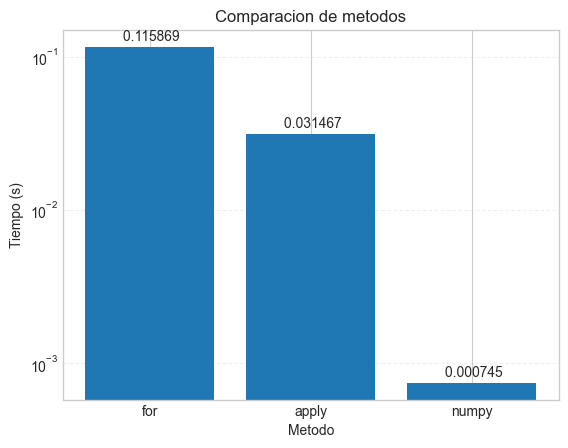

In [427]:
# comparacion de los 3 metodos
times = [time_for, time_apply, time_numpy]
methods = ['for', 'apply', 'numpy']
pd.DataFrame({'metodo': methods, 'tiempo': times})  # Comparacion de los 3 metodos
plt.bar(methods, times)
plt.title('Comparacion de metodos')
plt.yscale('log')  # Escala logaritmica para la grafica
plt.grid(axis='y', linestyle='--', alpha=0.3)  # Lineas de la grilla
plt.xlabel('Metodo')
plt.ylabel('Tiempo (s)')
for i, v in enumerate(times):
    plt.text(i, v * 1.1, f'{v: 2f}', ha='center', fontsize=10)  # Texto en la grafica


plt.show()  # Mostrar la grafica de comparacion de metodos



MANIPULACION DE STRINGS

In [373]:
# SERIE CON STRINGS
s = pd.Series(['  python_ciencia_datos  ', 'john_doe@gmail.com', 
               'CIENCIA de datos', ' Analisis Datos ',
               'python_3.8.5', 'numpy 2.2.5'])
s


0      python_ciencia_datos  
1          john_doe@gmail.com
2            CIENCIA de datos
3             Analisis Datos 
4                python_3.8.5
5                 numpy 2.2.5
dtype: object

In [374]:
# OPERACIONES CON STRINGS
s.str.lower()  # Convertir a minusculas

0      python_ciencia_datos  
1          john_doe@gmail.com
2            ciencia de datos
3             analisis datos 
4                python_3.8.5
5                 numpy 2.2.5
dtype: object

In [423]:
s.str.upper() # Convertir a mayusculas

0      PYTHON_CIENCIA_DATOS  
1          JOHN_DOE@GMAIL.COM
2            CIENCIA DE DATOS
3             ANALISIS DATOS 
4                PYTHON_3.8.5
5                 NUMPY 2.2.5
dtype: object

In [376]:
s.str.strip() # Eliminar espacios en blanco al inicio y al final

0    python_ciencia_datos
1      john_doe@gmail.com
2        CIENCIA de datos
3          Analisis Datos
4            python_3.8.5
5             numpy 2.2.5
dtype: object

In [377]:
s.str.replace('_', ' ')  # Reemplazar espacios en blanco por nada

0      python ciencia datos  
1          john doe@gmail.com
2            CIENCIA de datos
3             Analisis Datos 
4                python 3.8.5
5                 numpy 2.2.5
dtype: object

In [378]:
# EXTRACCION DE INFORMACION
s.str.contains('datos', case=False)  # extraer la palabra datos de la serie, case=False para que no distinga entre mayusculas y minusculas

0     True
1    False
2     True
3     True
4    False
5    False
dtype: bool

In [379]:
s.str[0:5]  # Extraer los primeros 5 caracteres de la serie

0      pyt
1    john_
2    CIENC
3     Anal
4    pytho
5    numpy
dtype: object

In [ ]:
# DIVISION DE STRINGS
s.str.split(' ')  # Dividir la serie por el caracter ' ' 

0    [, , python_ciencia_datos, , ]
1              [john_doe@gmail.com]
2              [CIENCIA, de, datos]
3             [, Analisis, Datos, ]
4                    [python_3.8.5]
5                    [numpy, 2.2.5]
dtype: object

In [381]:

s.str.split('_', expand=True)  # Dividir la serie por el caracter _ y expandir en columnas

,0,1,2
0,python,ciencia,datos
1,john,doe@gmail.com,None
2,CIENCIA de datos,None,None
3,Analisis Datos,None,None
4,python,3.8.5,None
5,numpy 2.2.5,None,None


EXPRESIONES REGULARES

In [382]:
s_number = pd.Series([
    'sales: 156.45 ϵ', 
    'price: 44.56', 
    'no number',
    'quantity: 77.00'
])
s_number

0    sales: 156.45 ϵ
1       price: 44.56
2          no number
3    quantity: 77.00
dtype: object

In [383]:
# extraer el numero de la serie
s_number.str.extract(r'(\d+\.\d+)')  

,0
0,156.45
1,44.56
2,NaN
3,77.00


In [384]:
s_emails = pd.Series([
    'john_dou@gmail.com',
    'peter@gmail', 
    'smith_01@gmail.com',
    'george.201@dominio.org',
    'ana_gmail.com',
    'lily@gmail.c'
])
s_emails
    
    

0        john_dou@gmail.com
1               peter@gmail
2        smith_01@gmail.com
3    george.201@dominio.org
4             ana_gmail.com
5              lily@gmail.c
dtype: object

In [385]:
# verificar si es un email valido
s_emails.str.contains(r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$')  # Verificar si es un email valido

0     True
1    False
2     True
3     True
4    False
5     True
dtype: bool

In [ ]:

s_emails.str.match(r'^[a-zA-Z0-9_.%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}+$')  # Verificar si es un email valido


0     True
1    False
2     True
3     True
4    False
5    False
dtype: bool

MANIPULACION Y USOS DE FECHAS

In [387]:
df_date_str  = pd.DataFrame({
    'Fecha': ['2020-01-15', '2019-03-22',
              '2021-06-10', '2018-11-05', 
              '2022-02-28'],
    'Hora': ['10:30:05', '12:45:50', 
             '14:15:23', '09:00:32', 
             '16:30:57'],
    'Fecha_hora': ['2020-01-15 10:30:05', 
                   '2019-03-22 12:45:50',
                   '2021-06-10 14:15:23',
                   '2018-11-05 09:00:32', 
                   '2022-02-28 16:30:57']   
})
df_date_str

,Fecha,Hora,Fecha_hora
0,2020-01-15,10:30:05,2020-01-15 10:30:05
1,2019-03-22,12:45:50,2019-03-22 12:45:50
2,2021-06-10,14:15:23,2021-06-10 14:15:23
3,2018-11-05,09:00:32,2018-11-05 09:00:32
4,2022-02-28,16:30:57,2022-02-28 16:30:57


In [388]:
# convertir fecha strigs a datetime
df_date_str['Fecha_date'] = pd.to_datetime(df_date_str['Fecha'])  # Convertir fecha a datetime
df_date_str['Hora_date'] = pd.to_datetime(df_date_str['Hora'], format='%H:%M:%S')  # Convertir hora a datetime
df_date_str['Fecha_hora_date'] = pd.to_datetime(df_date_str['Fecha_hora'])  # Convertir fecha y hora a datetime
df_date_str.dtypes  # Verificar el tipo de dato de cada columna


Fecha                      object
Hora                       object
Fecha_hora                 object
Fecha_date         datetime64[ns]
Hora_date          datetime64[ns]
Fecha_hora_date    datetime64[ns]
dtype: object

In [389]:
df_date_str# Verificar la columna de fechas convertidas a datetime
df_date_str 
df_date = df_date_str.copy()  # Copiar el DataFrame original para no modificarlo
df_date 


,Fecha,Hora,Fecha_hora,Fecha_date,Hora_date,Fecha_hora_date
0,2020-01-15,10:30:05,2020-01-15 10:30:05,2020-01-15,1900-01-01 10:30:05,2020-01-15 10:30:05
1,2019-03-22,12:45:50,2019-03-22 12:45:50,2019-03-22,1900-01-01 12:45:50,2019-03-22 12:45:50
2,2021-06-10,14:15:23,2021-06-10 14:15:23,2021-06-10,1900-01-01 14:15:23,2021-06-10 14:15:23
3,2018-11-05,09:00:32,2018-11-05 09:00:32,2018-11-05,1900-01-01 09:00:32,2018-11-05 09:00:32
4,2022-02-28,16:30:57,2022-02-28 16:30:57,2022-02-28,1900-01-01 16:30:57,2022-02-28 16:30:57


In [390]:
# adquirir componentes de la fecha
df_date['Fecha_date'].dt.year  # Extraer el año de la fecha


0    2020
1    2019
2    2021
3    2018
4    2022
Name: Fecha_date, dtype: int32

In [391]:
df_date['Fecha_date'].dt.month  # Extraer el mes de la fecha


0     1
1     3
2     6
3    11
4     2
Name: Fecha_date, dtype: int32

In [392]:
df_date['Hora_date'].dt.hour  # Extraer la hora de la fecha

0    10
1    12
2    14
3     9
4    16
Name: Hora_date, dtype: int32

In [393]:
df_date['Fecha_date'].dt.day # Extraer el dia de la fecha

0    15
1    22
2    10
3     5
4    28
Name: Fecha_date, dtype: int32

In [394]:
df_date['Fecha_date'].dt.day_name()  # Extraer el nombre del dia de la fecha    

0    Wednesday
1       Friday
2     Thursday
3       Monday
4       Monday
Name: Fecha_date, dtype: object

In [395]:
# manipular horas   
df_date['Hora_date'].dt.hour  # Extraer la hora de la fecha

0    10
1    12
2    14
3     9
4    16
Name: Hora_date, dtype: int32

In [396]:
df_date['Hora_date'].dt.minute  # Extraer el minuto de la fecha


0    30
1    45
2    15
3     0
4    30
Name: Hora_date, dtype: int32

In [397]:
df_date['Hora_date'].dt.second  # Extraer el segundo de la fecha


0     5
1    50
2    23
3    32
4    57
Name: Hora_date, dtype: int32

In [398]:
# sumar dias a una fecha
df_date['Fecha_date'] + pd.Timedelta(days=5)  # Sumar 5 dias a la fecha

0   2020-01-20
1   2019-03-27
2   2021-06-15
3   2018-11-10
4   2022-03-05
Name: Fecha_date, dtype: datetime64[ns]

In [ ]:
# diferencias entre fechas
date_start =  df_date['Fecha_hora_date'].min()  
date_end = df_date['Fecha_hora_date'].max()  
date_dif = date_end - date_start  
date_dif  

Timedelta('1211 days 07:30:25')

In [400]:
# Creacion de un rango de fechas
date_range = pd.date_range(start='2025-01-01',periods= 12, freq='MS')  # Rango de fechas
date_range

DatetimeIndex(['2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
               '2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01'],
              dtype='datetime64[ns]', freq='MS')

Leyenda de frecuencia

-'D' dia a dia

-'W' cada semana

-'MS' inicio del mes

-'ME' fin de mes

-'Q' trimestral (fin de semana)

-'A' anual(fin de año)

In [401]:
# series temporales
np.random.seed(40)  # Semilla para reproducibilidad
fechas_dias = pd.date_range(start='2025-01-01', end='2025-03-31', freq='D')  # Rango de fechas
valores_dias = np.random.randint(10, 100, size=len(fechas_dias))  # Valores aleatorios
s_dias = pd.Series(valores_dias, index=fechas_dias)  # Serie temporal
s_dias.head()  # Mostrar los primeros 5 valores de la serie temporal

2025-01-01    80
2025-01-02    17
2025-01-03    47
2025-01-04    66
2025-01-05    60
Freq: D, dtype: int32

In [402]:
# Agrupar por mes y sumar los valores
s_dias.resample('MS').sum()  # resample('MS')  


2025-01-01    1824
2025-02-01    1785
2025-03-01    1858
Freq: MS, dtype: int32

In [403]:
# Agrupar por mes y promediar los valores
s_dias.resample('MS').mean()  


2025-01-01    58.838710
2025-02-01    63.750000
2025-03-01    59.935484
Freq: MS, dtype: float64

COMBINACION DE DATASETS

In [404]:
# creamos dos dataframes
df_customers = pd.DataFrame({
    'id_cliente': [1, 2, 3, 4, 5],
    'Nombre': ['Ana', 'Carlos', 'Diana', 'Eduardo', 'Fernanda'],
    'Edad': [25, 32, 28, 40, 22],
    'ciudad': ['Madrid', 'Barcelona', 'Málaga', 'Sevilla', 'Murcia']
})
df_products = pd.DataFrame({
    'id_producto': [501, 502, 503, 504, 505, 506],
    'id_cliente': [1, 2, 3, 3, 5,6],
    'Producto': ['Laptop', 'Tablet', 'Smartphone', 'Monitor', 'Teclado', 'Mouse'],
    'Cantidad': [1, 2, 1, 3, 1, 2],
})
df_customers

,id_cliente,Nombre,Edad,ciudad
0,1,Ana,25,Madrid
1,2,Carlos,32,Barcelona
2,3,Diana,28,Málaga
3,4,Eduardo,40,Sevilla
4,5,Fernanda,22,Murcia


In [405]:
df_products

,id_producto,id_cliente,Producto,Cantidad
0,501,1,Laptop,1
1,502,2,Tablet,2
2,503,3,Smartphone,1
3,504,3,Monitor,3
4,505,5,Teclado,1
5,506,6,Mouse,2


MERGE

In [ ]:
# usando merge para unir los dataframes
# inner join
df_inner_join = pd.merge(df_customers, df_products, on='id_cliente')  
df_inner_join  

,id_cliente,Nombre,Edad,ciudad,id_producto,Producto,Cantidad
0,1,Ana,25,Madrid,501,Laptop,1
1,2,Carlos,32,Barcelona,502,Tablet,2
2,3,Diana,28,Málaga,503,Smartphone,1
3,3,Diana,28,Málaga,504,Monitor,3
4,5,Fernanda,22,Murcia,505,Teclado,1


In [ ]:
df_left_join = pd.merge(df_customers, df_products, on='id_cliente', how='left')  
df_left_join

,id_cliente,Nombre,Edad,ciudad,id_producto,Producto,Cantidad
0,1,Ana,25,Madrid,501.0,Laptop,1.0
1,2,Carlos,32,Barcelona,502.0,Tablet,2.0
2,3,Diana,28,Málaga,503.0,Smartphone,1.0
3,3,Diana,28,Málaga,504.0,Monitor,3.0
4,4,Eduardo,40,Sevilla,NaN,NaN,NaN
5,5,Fernanda,22,Murcia,505.0,Teclado,1.0


In [ ]:
df_right_join = pd.merge(df_customers, df_products, on='id_cliente', how='right')   
df_right_join

,id_cliente,Nombre,Edad,ciudad,id_producto,Producto,Cantidad
0,1,Ana,25.0,Madrid,501,Laptop,1
1,2,Carlos,32.0,Barcelona,502,Tablet,2
2,3,Diana,28.0,Málaga,503,Smartphone,1
3,3,Diana,28.0,Málaga,504,Monitor,3
4,5,Fernanda,22.0,Murcia,505,Teclado,1
5,6,NaN,NaN,NaN,506,Mouse,2


In [ ]:
df_outer_join = pd.merge(df_customers, df_products, on='id_cliente', how='outer')  
df_outer_join

,id_cliente,Nombre,Edad,ciudad,id_producto,Producto,Cantidad
0,1,Ana,25.0,Madrid,501.0,Laptop,1.0
1,2,Carlos,32.0,Barcelona,502.0,Tablet,2.0
2,3,Diana,28.0,Málaga,503.0,Smartphone,1.0
3,3,Diana,28.0,Málaga,504.0,Monitor,3.0
4,4,Eduardo,40.0,Sevilla,NaN,NaN,NaN
5,5,Fernanda,22.0,Murcia,505.0,Teclado,1.0
6,6,NaN,NaN,NaN,506.0,Mouse,2.0
